In [1]:
import numpy as np
from itertools import count
from tqdm import tqdm_notebook

def move(length, sigma):
    loc = np.random.uniform(0, length)
    for i in count():
        if not 0 < loc < length:
            return i
        loc += np.random.normal(0, sigma)
    

In [42]:
res = []
dist = []
X = np.logspace(0, 1.7, 200)
for i in tqdm_notebook(X):
    dist.append([move(i,1) for _ in range(1000)])
    res.append(np.mean(dist[-1]))

HBox(children=(IntProgress(value=0, max=200), HTML(value='')))

[0.27437719 1.88730446]


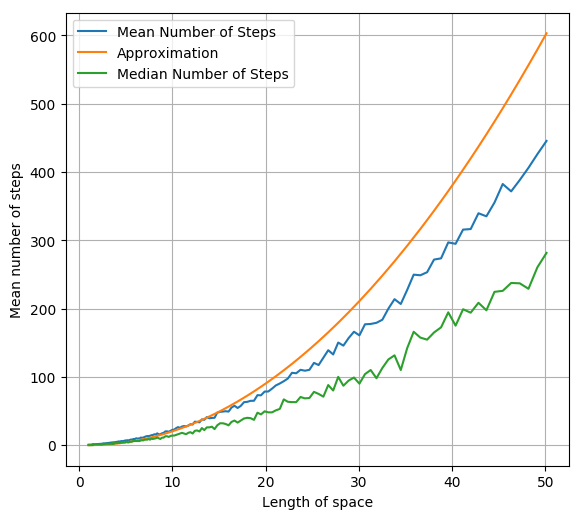

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt

X = np.array(X)
res = np.array([np.mean(i) for i in dist])
res2= np.array([np.median(i) for i in dist])


from scipy.optimize import curve_fit
def f(X, A, B):
    return A*X**(B)

args, _ = curve_fit(f, (X), (res-1))

plt.plot((X), (res-1))
# plt.plot((X), (f(X, *args)))
plt.plot(X,((X-1)/2)**2)
plt.plot(X, res2-1)
plt.xlabel("Length of space")
plt.ylabel("Mean number of steps")

# plt.plot(np.log(X), np.log(f(X, *args)))
# plt.plot(np.log(X), np.log(res-1))
print(args)
plt.grid()
plt.legend(["Mean Number of Steps","Approximation", 
            "Median Number of Steps"],
           # "95 Pecentile Mean Number of Steps"], 
                           loc="best")